<a href="https://colab.research.google.com/github/pavanthakur7/Forecasting-of-covid-vaccination/blob/main/Forecast_of_Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science /Major Project/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93939,ZWE,Africa,Zimbabwe,2021-06-02,39031.0,33.0,30.286,1599.0,0.0,1.429,2626.064,2.220,2.038,107.583,0.000,0.096,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2582.0,555779.0,37.394,0.174,1912.0,0.129,0.016,63.1,tests performed,1040214.0,682242.0,357972.0,8933.0,14739.0,7.00,4.59,2.41,992.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93940,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,2630.168,4.104,2.288,107.920,0.336,0.115,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1817.0,557596.0,37.516,0.122,1863.0,0.125,0.018,54.8,tests performed,1048504.0,684164.0,364340.0,8290.0,13588.0,7.05,4.60,2.45,914.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93941,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,2633.667,3.499,2.172,107.987,0.067,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056238.0,685564.0,370674.0,7734.0,11349.0,7.11,4.61,2.49,764.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93942,ZWE,Africa,Zimbabwe,

In [ ]:
#Remove the unnecessary columns
df = df.drop(columns=['iso_code', 'continent', 'new_cases',
       'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'])

In [ ]:
df.head()

,location,date,total_cases,total_deaths,people_vaccinated
0,Afghanistan,2020-02-24,1.0,NaN,NaN
1,Afghanistan,2020-02-25,1.0,NaN,NaN
2,Afghanistan,2020-02-26,1.0,NaN,NaN
3,Afghanistan,2020-02-27,1.0,NaN,NaN
4,Afghanistan,2020-02-28,1.0,NaN,NaN


In [ ]:
df.columns



Index(['location', 'date', 'total_cases', 'total_deaths', 'people_vaccinated'], dtype='object')

In [ ]:

df2 = df.dropna()
df2.shape

(12060, 5)

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2['total_cases'] = df2['total_cases'].astype(int)
df2['total_deaths'] = df2['total_deaths'].astype(int)
df2['people_vaccinated'] = df2['people_vaccinated'].astype(int)

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,location,date,total_cases,total_deaths,people_vaccinated
364,Afghanistan,2021-02-22,55617,2433,0
370,Afghanistan,2021-02-28,55714,2443,8200
386,Afghanistan,2021-03-16,55995,2460,54000
408,Afghanistan,2021-04-07,56873,2512,120000
423,Afghanistan,2021-04-22,58312,2561,240000
...,...,...,...,...,...
93938,Zimbabwe,2021-06-01,38998,1599,678003
93939,Zimbabwe,2021-06-02,39031,1599,682242
93940,Zimbabwe,2021-06-03,39092,1604,684164
93941,Zimbabwe,2021-06-04,39144,1605,685564


In [ ]:
#Taking 3 months vaccination data of india
#from date:6-3-21 to date:6-6-21
df2_india = df2[df2['location'] == 'India'][51:138]
df2_india.shape

(87, 5)

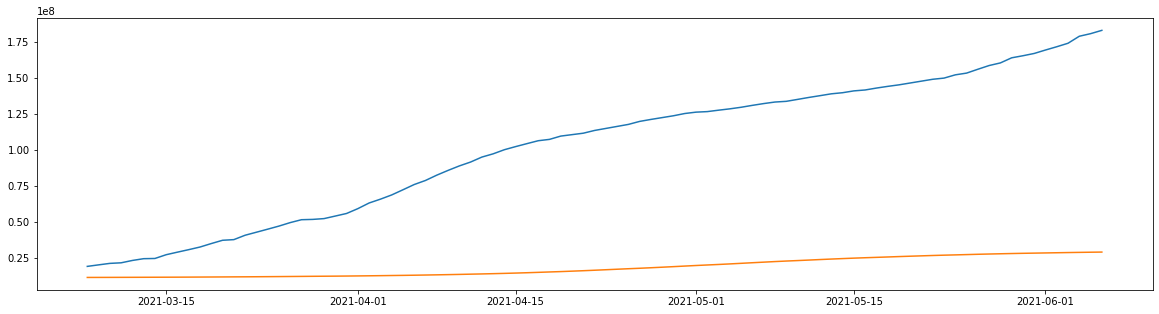

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df2_india['date'].sort_values(),df2_india['people_vaccinated'])
plt.plot(df2_india['date'].sort_values(),df2_india['total_cases'])

In [ ]:
df2_india = df2_india.rename(columns ={'people_vaccinated':'y','date':'ds'})

In [ ]:
df2_india

,location,ds,total_cases,total_deaths,y
39241,India,2021-03-08,11244786,157930,18943283
39242,India,2021-03-09,11262707,158063,20004227
39243,India,2021-03-10,11285561,158189,21034481
39244,India,2021-03-11,11308846,158306,21435841
39245,India,2021-03-12,11333728,158446,23075504
...,...,...,...,...,...
39327,India,2021-06-02,28441986,337989,171866824
39328,India,2021-06-03,28574350,340702,174296917
39329,India,2021-06-04,28694879,344082,179172948
39330,India,2021-06-05,28809339,346759,180972102


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


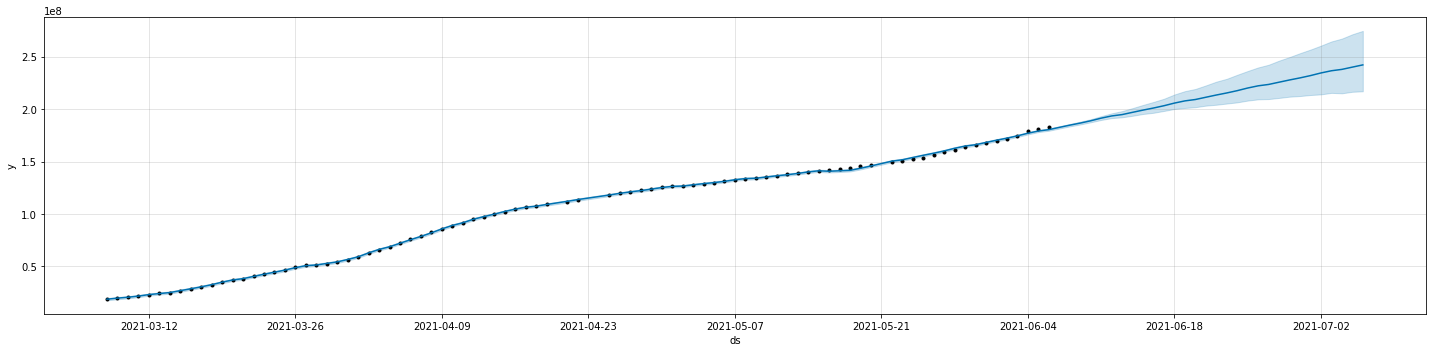

In [ ]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df2_india)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast = model.predict(x)
df3 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]

model.plot(forecast,figsize=(20,5));

In [ ]:
df


,location,date,total_cases,total_deaths,people_vaccinated
0,Afghanistan,2020-02-24,1.0,NaN,NaN
1,Afghanistan,2020-02-25,1.0,NaN,NaN
2,Afghanistan,2020-02-26,1.0,NaN,NaN
3,Afghanistan,2020-02-27,1.0,NaN,NaN
4,Afghanistan,2020-02-28,1.0,NaN,NaN
...,...,...,...,...,...
93939,Zimbabwe,2021-06-02,39031.0,1599.0,682242.0
93940,Zimbabwe,2021-06-03,39092.0,1604.0,684164.0
93941,Zimbabwe,2021-06-04,39144.0,1605.0,685564.0
93942,Zimbabwe,2021-06-05,39168.0,1605.0,686636.0


In [ ]:
df4 = df.drop(columns =['date','total_deaths','people_vaccinated'])
df4 = df4.dropna()
df4

,location,total_cases
0,Afghanistan,1.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,1.0
4,Afghanistan,1.0
...,...,...
93939,Zimbabwe,39031.0
93940,Zimbabwe,39092.0
93941,Zimbabwe,39144.0
93942,Zimbabwe,39168.0


In [ ]:

countries = df['location'].unique()


In [ ]:
countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'European Union',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'North Macedonia', 'Northern Cyprus', 'Norway', 'Oceania', 'Oman',
       'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Rwanda', 'Saint Helena', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela',
       'Vietnam', 'Wallis and Futuna', 'Yemen', 'Zambia',
       'Zimbabwe']

for i in countries:
    df5 = df4[df4['location'] == i ].sum()
    print("The total cases in %s are:"%i, df5['total_cases'])
   

The total cases in Afghanistan are: 17624978.0
The total cases in Albania are: 20827666.0
The total cases in Algeria are: 28722830.0
The total cases in Andorra are: 2489721.0
The total cases in Angola are: 5045305.0
The total cases in Anguilla are: 0.0
The total cases in Antigua and Barbuda are: 153960.0
The total cases in Argentina are: 535701910.0
The total cases in Armenia are: 44319582.0
The total cases in Aruba are: 0.0
The total cases in Australia are: 9688946.0
The total cases in Austria are: 103131221.0
The total cases in Azerbaijan are: 55041334.0
The total cases in Bahamas are: 2234840.0
The total cases in Bahrain are: 35896425.0
The total cases in Bangladesh are: 167934930.0
The total cases in Barbados are: 506952.0
The total cases in Belarus are: 68609567.0
The total cases in Belgium are: 187537983.0
The total cases in Belize are: 2502027.0
The total cases in Benin are: 1430046.0
The total cases in Bermuda are: 0.0
The total cases in Bhutan are: 209273.0
The total cases in 

In [ ]:
values = []
for i in countries:
    r = df4[df4['location'] == i ].sum()
    values.append(r['total_cases'])
     
print("The highest number of cases are ", max(values))



The highest number of cases are  6314709692.0


In [ ]:
# The country with highest number of cases is UNITED STATES

In [ ]:
values = []
for i in countries:
    r = df4[df4['location'] == i ].sum()
    values.append(r['total_cases'])
     
print("The lowest number of cases are ", min(values))

The lowest number of cases are  0.0


In [ ]:
# The countries with lowest number of cases are : Anguilla, Aruba, Bermuda, Cook Islands, Curacao, Gibraltar, Greenland, Guernsey, Isle of Man, Jersey, Macao, Montserrat, Nauru, New Caledonia, Northern Cyprus, Saint Helena, Tonga, Tuvalu, Wallis and Futuna

In [ ]:
df6 = df.drop(columns =['date','total_cases','people_vaccinated'])
df6 = df6.dropna()
df6
for i in countries:
    df7 = df6[df6['location'] == i ].sum()
    print("The total deaths in %s are:"%i, df7['total_deaths'])

The total deaths in Afghanistan are: 693269.0
The total deaths in Albania are: 395562.0
The total deaths in Algeria are: 862400.0
The total deaths in Andorra are: 33116.0
The total deaths in Angola are: 122734.0
The total deaths in Anguilla are: 0.0
The total deaths in Antigua and Barbuda are: 4395.0
The total deaths in Argentina are: 12748408.0
The total deaths in Armenia are: 806332.0
The total deaths in Aruba are: 0.0
The total deaths in Australia are: 275713.0
The total deaths in Austria are: 1763277.0
The total deaths in Azerbaijan are: 745096.0
The total deaths in Bahamas are: 47660.0
The total deaths in Bahrain are: 132568.0
The total deaths in Bangladesh are: 2470917.0
The total deaths in Barbados are: 6988.0
The total deaths in Belarus are: 511808.0
The total deaths in Belgium are: 6492431.0
The total deaths in Belize are: 60136.0
The total deaths in Benin are: 19853.0
The total deaths in Bermuda are: 0.0
The total deaths in Bhutan are: 150.0
The total deaths in Bolivia are: 3

In [ ]:
values = []
for i in countries:
    r = df6[df6['location'] == i ].sum()
    values.append(r['total_deaths'])
     
print("The highest number of deaths are ", max(values))

The highest number of deaths are  135748105.0


In [ ]:
# The country with highest deaths is European Union.

In [ ]:
values = []
for i in countries:
    r = df6[df6['location'] == i ].sum()
    values.append(r['total_deaths'])
     
print("The lowest number of deaths are ", min(values))

The lowest number of deaths are  0.0


In [ ]:
# The countries with lowest number of deaths are: Anguilla, Aruba, Bermuda, British Virgin Islands, Cayman Islands, Cook Islands, Curacao, Dominica, Faeroe Islands, Falkland Islands, Gibraltar, Greenland, Guernsey, Isle of Man, Jersey, Kiribati, Macao, Montserrat, Nauru, New Caledonia, Northern Cyprus, Saint Helena, Samoa, Solomon Islands, Tonga, Tuvalu, Vatican, Wallis and Futuna

In [ ]:
df8 = df.drop(columns =['date','total_cases','total_deaths'])
df8 = df8.dropna()
df8
for i in countries:
    df9 = df8[df8['location'] == i ].sum()
    print("The total people vaccinated in %s are:"%i, df9['people_vaccinated'])

The total people vaccinated in Afghanistan are: 3738648.0
The total people vaccinated in Albania are: 8460569.0
The total people vaccinated in Algeria are: 0.0
The total people vaccinated in Andorra are: 183918.0
The total people vaccinated in Angola are: 4717488.0
The total people vaccinated in Anguilla are: 52845.0
The total people vaccinated in Antigua and Barbuda are: 570176.0
The total people vaccinated in Argentina are: 541662382.0
The total people vaccinated in Armenia are: 90632.0
The total people vaccinated in Aruba are: 2692769.0
The total people vaccinated in Australia are: 54227486.0
The total people vaccinated in Austria are: 207332279.0
The total people vaccinated in Azerbaijan are: 68974851.0
The total people vaccinated in Bahamas are: 207803.0
The total people vaccinated in Bahrain are: 71581602.0
The total people vaccinated in Bangladesh are: 342993444.0
The total people vaccinated in Barbados are: 6013469.0
The total people vaccinated in Belarus are: 1674177.0
The tot

In [ ]:
values = []
for i in countries:
    r = df8[df8['location'] == i ].sum()
    values.append(r['people_vaccinated'])
     
print("The highest number of vaccination are ", max(values))

The highest number of vaccination are  13084482548.0


In [ ]:
# The most vaccinated country is United States